In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set dafault parameters
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.titlesize"] = 19
plt.rcParams['axes.labelsize'] = 16
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

In [3]:
# import data and info
data= pd.read_csv('Covid19Casos29_4_2021.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9780632 entries, 0 to 9780631
Data columns (total 25 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   id_evento_caso                    int64  
 1   sexo                              object 
 2   edad                              float64
 3   edad_años_meses                   object 
 4   residencia_pais_nombre            object 
 5   residencia_provincia_nombre       object 
 6   residencia_departamento_nombre    object 
 7   carga_provincia_nombre            object 
 8   fecha_inicio_sintomas             object 
 9   fecha_apertura                    object 
 10  sepi_apertura                     int64  
 11  fecha_internacion                 object 
 12  cuidado_intensivo                 object 
 13  fecha_cui_intensivo               object 
 14  fallecido                         object 
 15  fecha_fallecimiento               object 
 16  asistencia_respiratoria_mecanica  ob

In [4]:
# Transpose data.head() so we can see all columns
data.head().T

,0,1,2,3,4
id_evento_caso,1000000,10000000,10000001,10000002,10000003
sexo,M,F,F,F,F
edad,54,52,22,43,33
edad_años_meses,Años,Años,Años,Años,Años
residencia_pais_nombre,Argentina,Argentina,Argentina,Argentina,Argentina
residencia_provincia_nombre,CABA,CABA,Buenos Aires,Buenos Aires,CABA
residencia_departamento_nombre,SIN ESPECIFICAR,SIN ESPECIFICAR,Lomas de Zamora,La Matanza,COMUNA 01
carga_provincia_nombre,Buenos Aires,CABA,Buenos Aires,CABA,CABA
fecha_inicio_sintomas,NaN,NaN,2021-04-05,NaN,NaN
fecha_apertura,2020-06-01,2021-04-08,2021-04-08,2021-04-08,2021-04-08


In [5]:
# Drop irrelevant columns for this analisis
data.drop(columns=['residencia_departamento_id','residencia_provincia_id','clasificacion','origen_financiamiento',
                   'carga_provincia_id','fecha_cui_intensivo','sepi_apertura','fecha_apertura','residencia_departamento_nombre',
                   'residencia_provincia_nombre','id_evento_caso','edad_años_meses'],inplace=True)

In [6]:
# Change some columns names
data.rename(columns={'residencia_pais_nombre':'pais','carga_provincia_nombre':'provincia','cuidado_intensivo':'terapia_intensiva',
                     'asistencia_respiratoria_mecanica':'asistencia_respiratoria',
                     'clasificacion_resumen':'clasificacion'},inplace=True)

In [7]:
# Deleting entrys with ages <0
mask_wrong_age = data['edad'] <=0
mask_wrong_age[mask_wrong_age].index
data.drop(index=mask_wrong_age[mask_wrong_age].index,inplace=True)


In [8]:
# Deleting entrys with no ages
mask_age_null = data['edad'].isnull()
mask_age_null[mask_age_null].index
data.drop(index=mask_age_null[mask_age_null].index,inplace=True)

In [9]:
# Deleting entrys with ages >100
mask_wrong_age= data['edad'] >=100
data.drop(index=mask_wrong_age[mask_wrong_age].index,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773146 entries, 0 to 9780631
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   sexo                     object 
 1   edad                     float64
 2   pais                     object 
 3   provincia                object 
 4   fecha_inicio_sintomas    object 
 5   fecha_internacion        object 
 6   terapia_intensiva        object 
 7   fallecido                object 
 8   fecha_fallecimiento      object 
 9   asistencia_respiratoria  object 
 10  clasificacion            object 
 11  fecha_diagnostico        object 
 12  ultima_actualizacion     object 
dtypes: float64(1), object(12)
memory usage: 1.0+ GB


In [11]:
# Change some date columns to datetime type
to_date = ['fecha_inicio_sintomas','fecha_internacion','fecha_fallecimiento','fecha_diagnostico', 'ultima_actualizacion']
for i in to_date:
    data[i]=pd.to_datetime(data[i])

In [12]:
#set fecha_diagnostico = fecha_inicio_sintomas for earlier dates than pandemic begining
wrong_dates = data['fecha_diagnostico'] < '2020-01-01'
data.loc[wrong_dates,'fecha_diagnostico'] = data.loc[wrong_dates,'fecha_inicio_sintomas']

In [13]:
data.head()

,sexo,edad,pais,provincia,fecha_inicio_sintomas,fecha_internacion,terapia_intensiva,fallecido,fecha_fallecimiento,asistencia_respiratoria,clasificacion,fecha_diagnostico,ultima_actualizacion
0,M,54.0,Argentina,Buenos Aires,NaT,NaT,NO,NO,NaT,NO,Descartado,2020-06-09,2021-04-28
1,F,52.0,Argentina,CABA,NaT,NaT,NO,NO,NaT,NO,Descartado,2021-04-08,2021-04-28
2,F,22.0,Argentina,Buenos Aires,2021-04-05,NaT,NO,NO,NaT,NO,Descartado,2021-04-08,2021-04-28
3,F,43.0,Argentina,CABA,NaT,NaT,NO,NO,NaT,NO,Descartado,2021-04-06,2021-04-28
4,F,33.0,Argentina,CABA,NaT,NaT,NO,NO,NaT,NO,Descartado,2021-04-08,2021-04-28


In [14]:
#Number of diagnosed
numb_diagnosed = data['clasificacion'].count()
print(f'La cantidad de casos diagnosticados es: {numb_diagnosed}')

La cantidad de casos diagnosticados es: 9773146


In [15]:
# Some statistical information
mean_age = data['edad'].mean()
median_age = data['edad'].median()

In [16]:
def hist_plot(column,title,xlabel,ylabel,ax):
    column_mean = int(column.mean())
    column.plot(kind='hist',alpha=0.4,edgecolor='black',color='red',grid=False,label='Distribucón de la Edad de los Casos Confirmados',ax=ax)
    ax.xlabel(xlabel)
    ax.ylabel(ylabel)
    plt.suptitle(title)
    #plt.axvline(column_mean,linestyle='dashed',label=f'Mean = {column_mean} años',color='b',ax=ax)
    plt.legend()

In [33]:
edades_confirmados = data.loc[data['clasificacion'] == 'Confirmado']['edad']
fallecidos = data['fallecido'] == 'SI'
edad_fallecidos = data['edad'].loc[fallecidos]

media_edad_confirmados = int(edades_confirmados.mean())
media_edad_fallecidos = int(edad_fallecidos.mean())


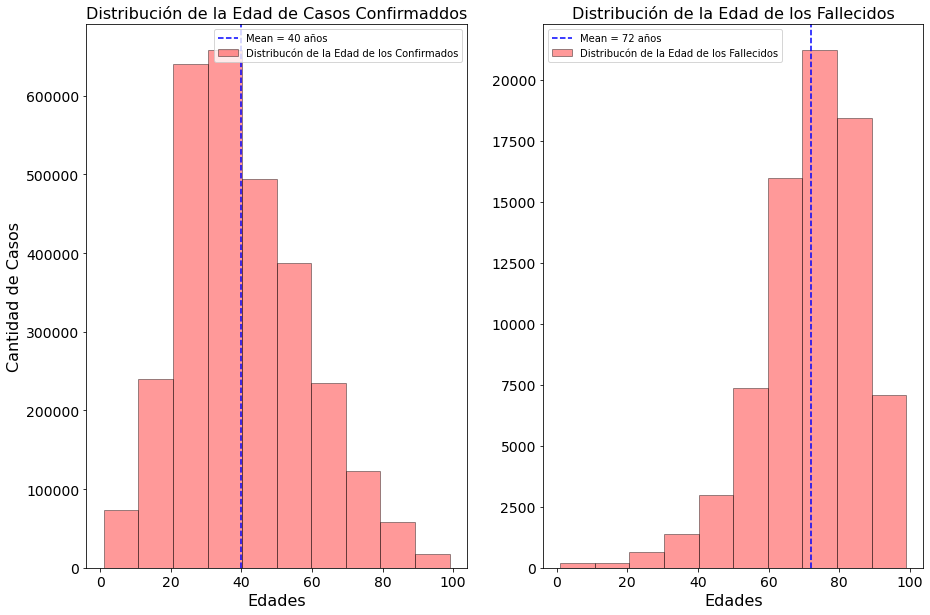

In [47]:
figure,ax = plt.subplots(1,2,figsize=(15,10))
ax=ax.ravel()
edades_confirmados.plot(kind='hist',alpha=0.4,edgecolor='black',color='red',grid=False,label='Distribucón de la Edad de los Confirmados', ax=ax[0])
ax[0].set_xlabel('Edades')
ax[0].set_ylabel('Cantidad de Casos')
ax[0].set_title('Distribución de la Edad de Casos Confirmaddos',size=16)
ax[0].axvline(media_edad_confirmados,linestyle='dashed',label=f'Mean = {media_edad_confirmados} años',color='b')
ax[0].legend()

edad_fallecidos.plot(kind='hist',alpha=0.4,edgecolor='black',color='red',grid=False,label='Distribucón de la Edad de los Fallecidos',ax=ax[1])
ax[1].set_xlabel('Edades')
ax[1].set_ylabel('')
ax[1].set_title('Distribución de la Edad de los Fallecidos',size=16)
ax[1].axvline(media_edad_fallecidos,linestyle='dashed',label=f'Mean = {media_edad_fallecidos} años',color='b')
ax[1].legend()



In [19]:
# Some statistical information
# All
mean_age = data['edad'].mean()
median_age = data['edad'].median()



Text(0.5, 1.0, 'Porcentaje de los Diagnosticos')

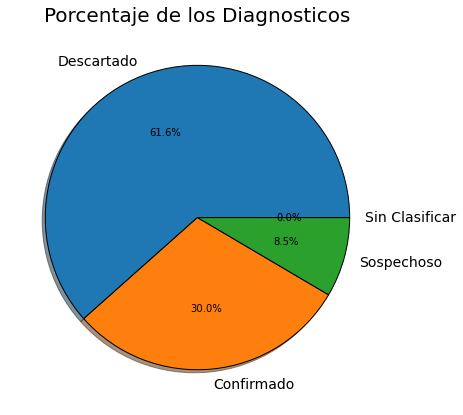

In [20]:
# Plot diagnose_type
diagnose_types = data['clasificacion'].value_counts()
diagnose_types.plot(kind='pie',wedgeprops={'edgecolor': 'black'},autopct='%1.1f%%',shadow=True)
plt.ylabel('')
plt.title('Porcentaje de los Diagnosticos')


In [22]:
#Cantidad de muertos
data.groupby(['fallecido','sexo']).agg({'edad':'mean'})

edad
fallecido sexo           
NO        F     39.203299
          M     38.572182
          NR    39.159357
SI        F     74.332389
          M     69.997549
          NR    80.195706

Text(0.5, 1.0, 'Fallecidos Totales por Genero')

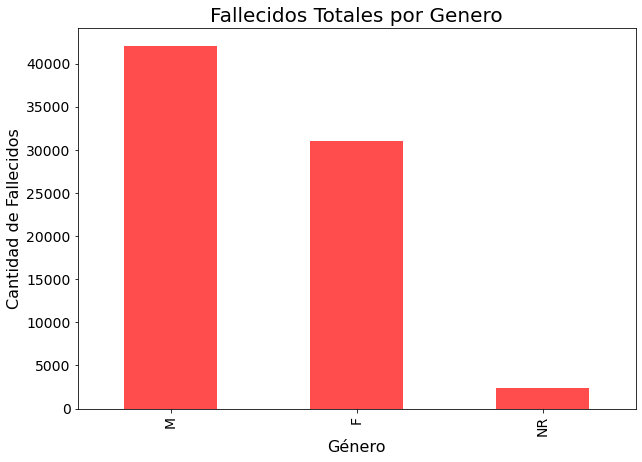

In [23]:
# De los fallecidos cuantos son hombres y cuantos mujeres
data.loc[fallecidos,'sexo'].value_counts().plot(kind='bar',color='r',alpha=0.7)
plt.ylabel('Cantidad de Fallecidos')
plt.xlabel('Género')
plt.title('Fallecidos Totales por Genero')

In [24]:
#De los fallecidos cuantos necesitaron terapia_intensiva
fallecios_terapia_intensiva = fallecidos & (data['terapia_intensiva'] == 'SI')

In [25]:
confirmados = data['clasificacion'] == 'Confirmado'
confirmados_darios = data.loc[confirmados,'fecha_diagnostico'].value_counts()


In [26]:
confirmados_darios.sort_index()

2020-01-01        3
2020-01-02       13
2020-01-04        7
2020-01-05        4
2020-01-06        8
              ...  
2021-04-24    15074
2021-04-25     8331
2021-04-26    20171
2021-04-27    16784
2021-04-28     4599
Name: fecha_diagnostico, Length: 444, dtype: int64

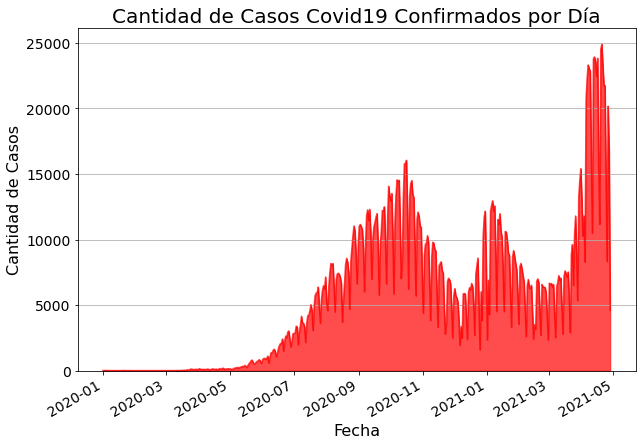

In [44]:
# Cantidad de casos confirmados por día
figure,ax=plt.subplots()
confirmados = data['clasificacion'] == 'Confirmado'
confirmados_darios = data.loc[confirmados,'fecha_diagnostico'].value_counts()
confirmados_darios.sort_index().plot(kind='area',alpha=0.7,color='r')
plt.title('Cantidad de Casos Covid19 Confirmados por Día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Casos')
ax.yaxis.grid(True)


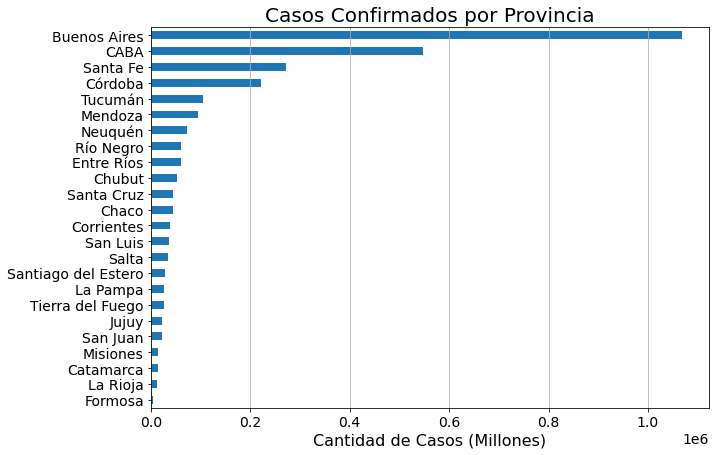

In [42]:
#Cantidad de casos por Provincia
figure,ax=plt.subplots()
confirmados_provincia = data.loc[confirmados,'provincia']
confirmados_provincia.value_counts()[::-1].plot(kind='barh',grid=False)
plt.title('Casos Confirmados por Provincia')
plt.xlabel('Cantidad de Casos (Millones)')
ax.xaxis.grid(True)

In [29]:
#Evolución de los fallecidos por fecha
recuento_fallecidos = data.loc[fallecidos,'fecha_fallecimiento'].value_counts().sort_index().cumsum()

Text(0.5, 1.0, 'Suma Acumulada de Fallecidos')

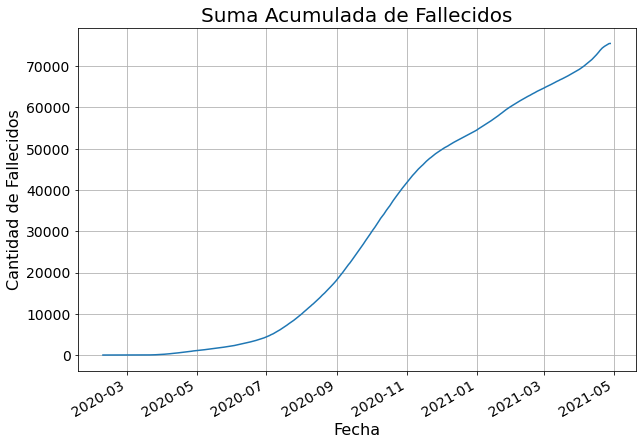

In [36]:
recuento_fallecidos.plot(kind='line',grid=True)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Fallecidos')
plt.title('Suma Acumulada de Fallecidos')
